In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np

Single Core represents single threaded performace, faster CPUS generally score better here.  Multi Core Score represents multi threaded performance, CPUS with more cores generally score better here.

In [309]:
data = pd.read_csv("Compute Score.csv") 
data.head()

,Location,Provider,Category,VM,CPU,RAM (GB),Single Score,Multi Score,Price,Price Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,NaN,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,NaN,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0


In [310]:
#NA values in location turned into NaN, changed it to 'North America'
values = {'Location': 'North America'}
data = data.fillna(value=values)
data.head()

,Location,Provider,Category,VM,CPU,RAM (GB),Single Score,Multi Score,Price,Price Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,North America,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,North America,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0


In [488]:
data

,Location,Provider,Category,VM,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,North America,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,North America,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0
5,North America,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0
6,Worldwide,Amazon Web Services,Burstable Performance,t2.small,1,2.0,3264,3117,0.023,1355.0
7,North America,Amazon Web Services,Burstable Performance,t2.small,1,2.0,3264,3117,0.023,1355.0
8,Worldwide,DigitalOcean,General Purpose,1CPU 1GB,1,1.0,2428,2311,0.015,1540.0
9,North America,DigitalOcean,General Purpose,1CPU 1GB,1,1.0,2428,2311,0.015,1540.0


In [311]:
data.describe()

,CPU,RAM (GB),Single Score,Multi Score,Price,Price Score
count,86.0,86.000000,86.000000,86.000000,59.000000,59.000000
mean,1.0,2.888372,2822.581395,2828.546512,0.032454,1672.559322
std,0.0,3.597366,618.968544,965.285275,0.023930,1337.119914
min,1.0,0.500000,878.000000,849.000000,0.007000,236.000000
25%,1.0,1.000000,2506.250000,2673.500000,0.013500,600.000000
50%,1.0,2.000000,2974.500000,2862.500000,0.023000,1203.000000
75%,1.0,3.500000,3146.500000,3020.500000,0.048000,2311.500000
max,1.0,24.000000,4196.000000,8211.000000,0.090000,4974.000000


In [306]:
storage = pd.read_csv("Storage Performance.csv")
storage.head()
values = {'Location': 'North America'}
storage = storage.fillna(value=values)
storage.head()

,Location,Provider,VM,Size,Volume Type,Read IOPS,Write IOPS,Read Bandwidth,Write Bandwidth
0,Worldwide,1&1,M,50,SSD,175077,26983,613,264
1,Worldwide,1&1,S,50,SSD,180611,33262,614,501
2,Worldwide,Google Cloud Platform,n1-standard-1 Intel Broadwell,30,SSD Persistent Disk,2611,1697,41,41
3,Worldwide,Google Cloud Platform,n1-standard-1 Intel Broadwell,50,SSD Persistent Disk,2611,2489,41,42
4,Worldwide,Microsoft Azure,Basic_A0,50,No cache Standard LRS,501,503,60,59


In [307]:
storage.describe()

,Size,Read IOPS,Write IOPS,Read Bandwidth,Write Bandwidth
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,43.636364,17267.181818,3473.818182,173.909091,110.681818
std,9.534626,51989.479968,8726.173894,235.214575,149.725268
min,30.000000,243.000000,109.000000,31.000000,21.000000
25%,30.000000,504.000000,268.750000,41.000000,34.250000
50%,50.000000,676.500000,502.000000,60.000000,52.500000
75%,50.000000,2464.750000,1400.000000,177.750000,59.000000
max,50.000000,180611.000000,33262.000000,719.000000,501.000000


In [312]:
stats.ttest_ind(data["Single Score"], data["Multi Score"])

Ttest_indResult(statistic=-0.048241649974128276, pvalue=0.9615802854492471)

In [313]:
data.columns

Index(['Location', 'Provider', 'Category', 'VM', 'CPU', 'RAM (GB)',
       'Single Score', 'Multi Score', 'Price', 'Price Score'],
      dtype='object')

In [314]:
data.rename(index=str, columns={"RAM (GB)": "RAM_GB", "Single Score": "Single_Score", "Multi Score": "Multi_Score", "Price Score": "Price_Score"}, inplace=True)

In [315]:
data.head()

,Location,Provider,Category,VM,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,North America,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,North America,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0


/Users/fhel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fhel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


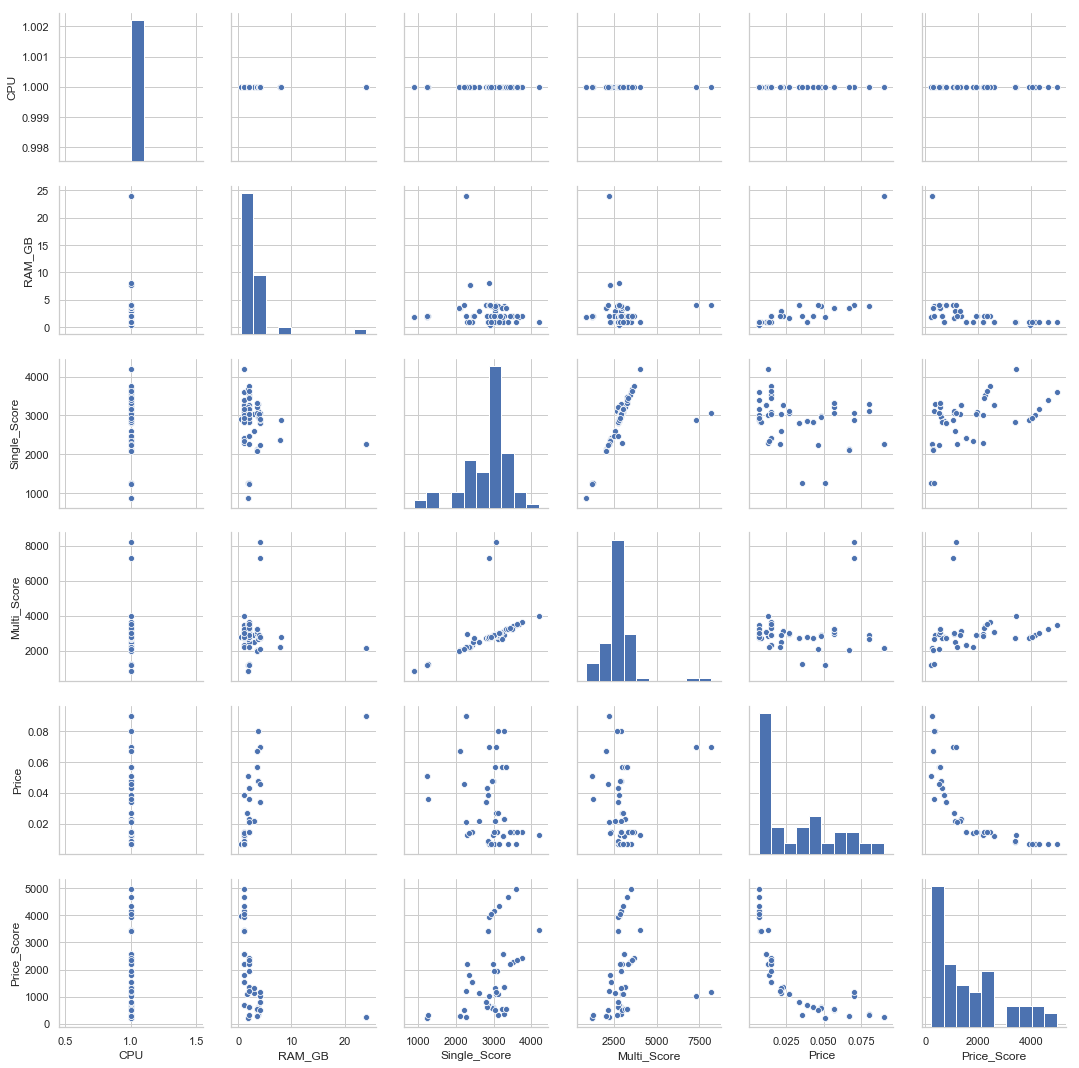

In [316]:
sns.pairplot(data)

In [318]:
data.corr()

,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score
CPU,NaN,NaN,NaN,NaN,NaN,NaN
RAM_GB,NaN,1.000000,-0.166557,-0.069638,0.632882,-0.383650
Single_Score,NaN,-0.166557,1.000000,0.626273,-0.302783,0.432433
Multi_Score,NaN,-0.069638,0.626273,1.000000,0.073639,0.161024
Price,NaN,0.632882,-0.302783,0.073639,1.000000,-0.782811
Price_Score,NaN,-0.383650,0.432433,0.161024,-0.782811,1.000000


In [319]:
stats.ttest_ind(data.RAM_GB, data.Single_Score)

Ttest_indResult(statistic=-42.244983251550316, pvalue=4.4988647547587305e-92)

/Users/fhel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fhel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Price Distribution')

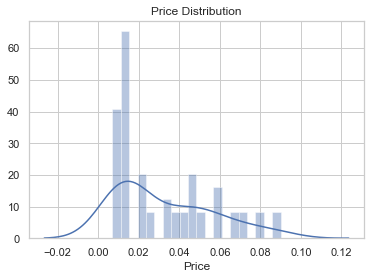

In [320]:
sns.distplot(data['Price'], bins=20).set_title("Price Distribution")

Text(0.5, 1.0, 'Single Score Distribution')

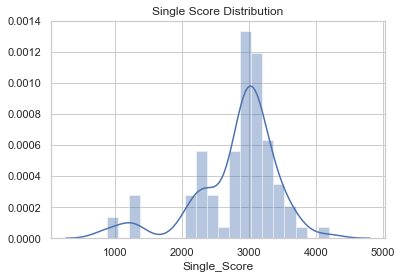

In [109]:
sns.distplot(data['Single_Score'], bins=20).set_title("Single Score Distribution")

Text(0.5, 1.0, 'Multi Score Distribution')

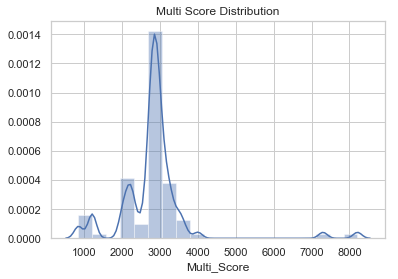

In [110]:
sns.distplot(data['Multi_Score'], bins=20).set_title("Multi Score Distribution")

Text(0.5, 1.0, 'Single_Score vs Price')

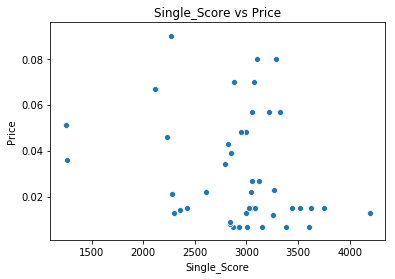

In [78]:
sns.scatterplot(x=data['Single_Score'], y=data['Price']).set_title('Single_Score vs Price')

Text(0.5, 1.0, 'Multi_Score vs Price')

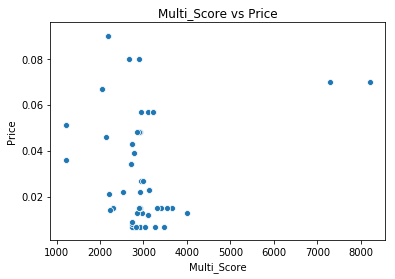

In [79]:
sns.scatterplot(x=data['Multi_Score'], y=data['Price']).set_title('Multi_Score vs Price')

Text(0.5, 1.0, 'RAM (GB) vs Price')

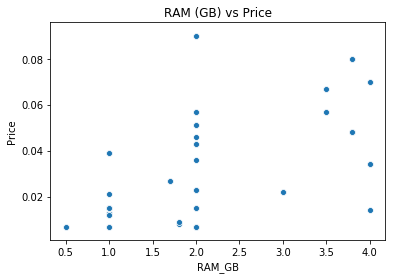

In [81]:
sns.scatterplot(x=data2['RAM_GB'], y=data['Price']).set_title('RAM (GB) vs Price')

In [35]:
data['Provider'].value_counts()

Microsoft Azure                 22
DigitalOcean                    10
Joyent                           8
T-Systems Open Telekom Cloud     7
Google Cloud Platform            6
Linode                           6
IBM Softlayer                    6
Vultr                            4
Amazon Web Services              4
1&1                              4
UpCloud                          4
OVH Group                        4
Exoscale                         1
Name: Provider, dtype: int64

In [102]:
data['Single_Score'].describe()

count      86.000000
mean     2822.581395
std       618.968544
min       878.000000
25%      2506.250000
50%      2974.500000
75%      3146.500000
max      4196.000000
Name: Single_Score, dtype: float64

In [325]:
pdata = data.groupby(['Provider'])
pdata.head()

,Location,Provider,Category,VM,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,North America,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,North America,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0
5,North America,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0
6,Worldwide,Amazon Web Services,Burstable Performance,t2.small,1,2.0,3264,3117,0.023,1355.0
7,North America,Amazon Web Services,Burstable Performance,t2.small,1,2.0,3264,3117,0.023,1355.0
8,Worldwide,DigitalOcean,General Purpose,1CPU 1GB,1,1.0,2428,2311,0.015,1540.0
9,North America,DigitalOcean,General Purpose,1CPU 1GB,1,1.0,2428,2311,0.015,1540.0


In [106]:
pdata['Single_Score'].mean()

Provider
1&1                             2783.500000
Amazon Web Services             3261.500000
DigitalOcean                    2828.800000
Exoscale                        4196.000000
Google Cloud Platform           3013.166667
IBM Softlayer                   2821.000000
Joyent                          3022.625000
Linode                          2724.000000
Microsoft Azure                 2441.000000
OVH Group                       2990.750000
T-Systems Open Telekom Cloud    2651.714286
UpCloud                         3214.500000
Vultr                           3365.750000
Name: Single_Score, dtype: float64

In [327]:
google = data['Single_Score'][data['Provider']=="Google Cloud Platform"]
google.mean()

3013.1666666666665

In [328]:
amazon = data['Single_Score'][data['Provider']=="Amazon Web Services"]
amazon.mean()

3261.5

In [329]:
vultr = data['Single_Score'][data['Provider']=="Vultr"]
vultr.mean()

3365.75

In [330]:
azure = data['Single_Score'][data['Provider']=="Microsoft Azure"]
azure.mean()

2441.0

In [482]:
single = data['Single_Score']
multi = data['Multi_Score']

In [483]:
stats.ttest_ind(single, multi)

Ttest_indResult(statistic=-0.048241649974128276, pvalue=0.9615802854492471)

<h3>I ran a t-test to compare the difference in performance between Google Cloud and Amazon Web Services.  Google Cloud's mean score of 3013 and Amazon Web Services mean score of 3261.5 returned a P-Value of 7.217.  The difference between them are not statistically significant</h3>

In [331]:
stats.ttest_ind(google, amazon)

Ttest_indResult(statistic=-7.456906662882246, pvalue=7.216927083742153e-05)

<h3>I then ran a T-test comparing the Providers with the highest and lowest mean Single Score.  Vultr (3365) and Microsoft Azure (2441) returned a P-Value of 0.067.  Again the difference between them are not statisticaly significant.</h3>

In [332]:
stats.ttest_ind(vultr, azure)

Ttest_indResult(statistic=1.9169135270318711, pvalue=0.06722937275793596)

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

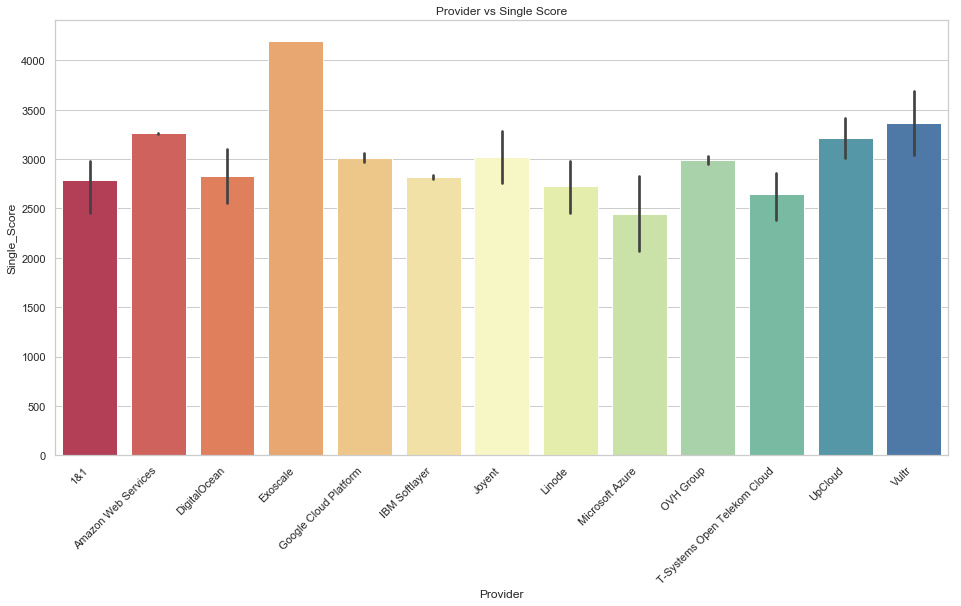

In [473]:
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="Provider", y="Single_Score", data=data, palette='Spectral')
ax.set_title("Provider vs Single Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

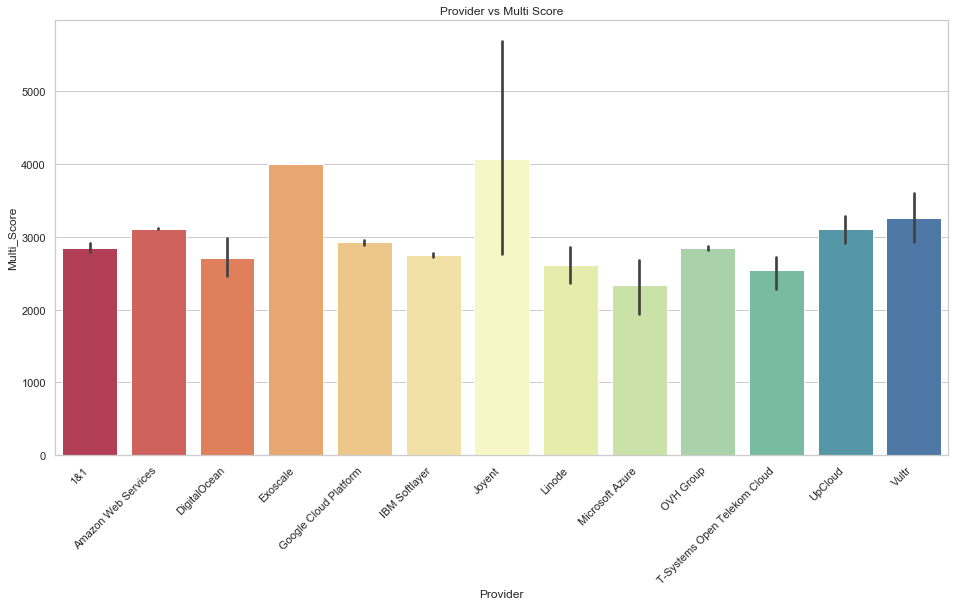

In [474]:
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="Provider", y="Multi_Score", data=data, palette='Spectral')
ax.set_title("Provider vs Multi Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

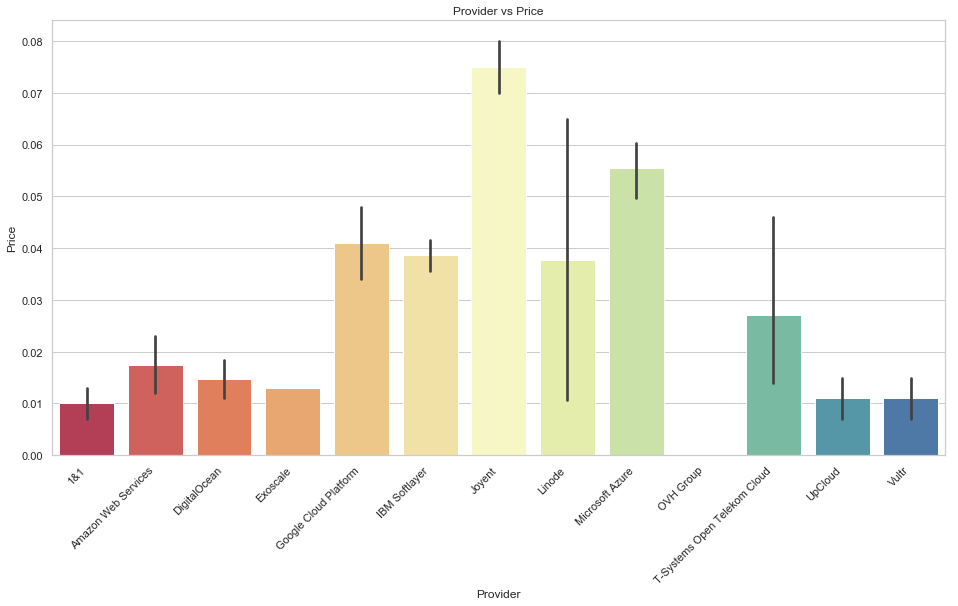

In [475]:
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="Provider", y="Price", data=data, palette='Spectral')
ax.set_title("Provider vs Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

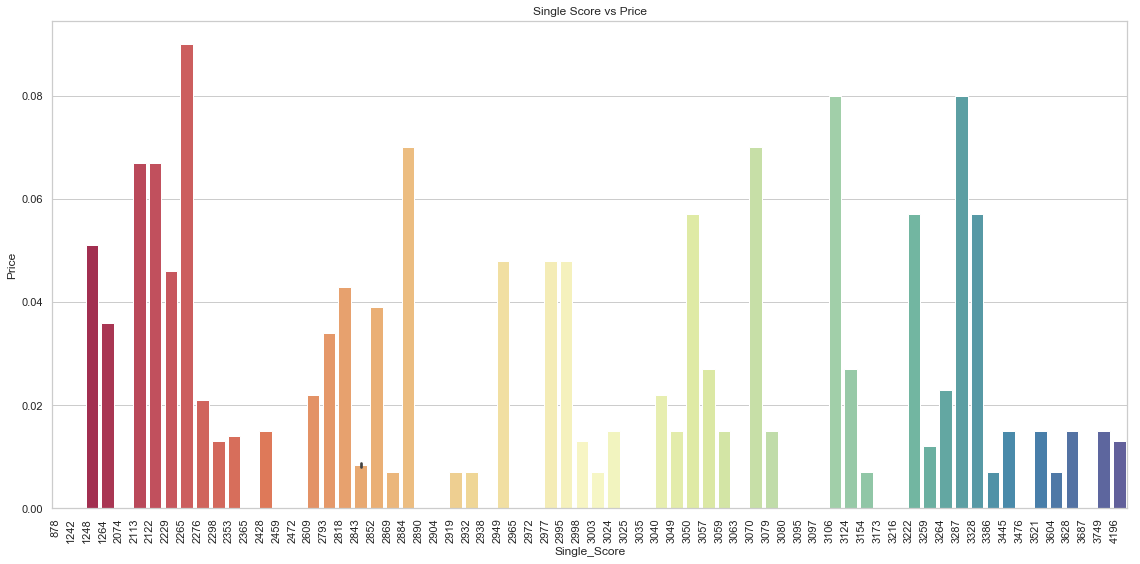

In [121]:
plt.figure(figsize = (16, 8))
# sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="Single_Score", y="Price", data=data, palette='Spectral')
ax.set_title("Single Score vs Price")
# sns.load_dataset


ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

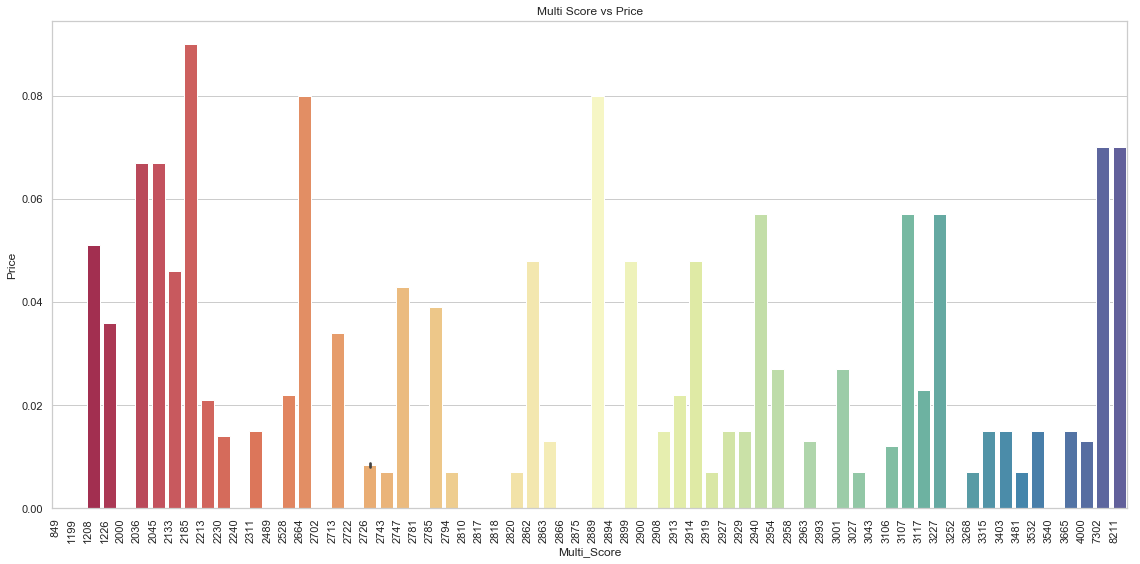

In [476]:
plt.figure(figsize = (16, 8))
# sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="Multi_Score", y="Price", data=data, palette='Spectral')
ax.set_title("Multi Score vs Price")
# sns.load_dataset


ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [333]:
data['RAM_GB'].value_counts()

2.0     26
1.0     21
3.5      8
3.8      6
1.8      6
4.0      6
3.9      2
1.7      2
7.8      2
24.0     2
3.0      2
0.5      2
8.0      1
Name: RAM_GB, dtype: int64

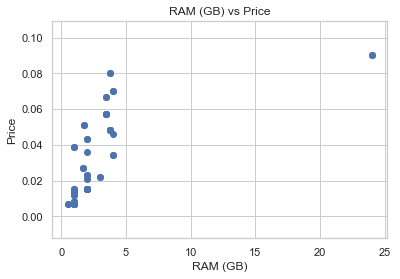

In [334]:
plt.scatter(data.RAM_GB,data.Price)
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('RAM (GB) vs Price')
plt.show()

In [335]:
#edited to get rid of outlier.  there were 2 entries of 24GB data when the rest of the data (97%) 
# was in the 1GB to 4 GB range
data2 = pd.read_csv("Compute Score edited.csv")
data2.head()

,Location,Provider,Category,VM,CPU,RAM (GB),Single Score,Multi Score,Price,Price Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,NaN,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,NaN,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0


In [336]:
values = {'Location': 'North America'}
data2 = data2.fillna(value=values)

In [337]:
#renaming columns to get rid of spaces in col names
data2.rename(index=str, columns={"RAM (GB)": "RAM_GB", "Single Score": "Single_Score", "Multi Score": "Multi_Score", "Price Score": "Price_Score"}, inplace=True)

In [338]:
data2['RAM_GB'].value_counts()

2.0    26
1.0    21
3.5     8
3.8     6
1.8     6
4.0     6
3.9     2
1.7     2
7.8     2
3.0     2
0.5     2
8.0     1
Name: RAM_GB, dtype: int64

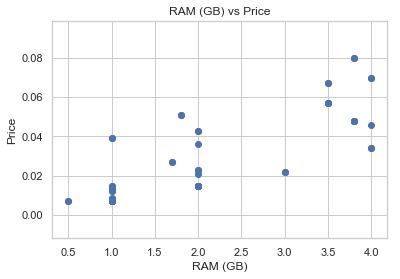

In [150]:
plt.scatter(data2.RAM_GB,data2.Price)
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('RAM (GB)edited vs Price')
plt.show()

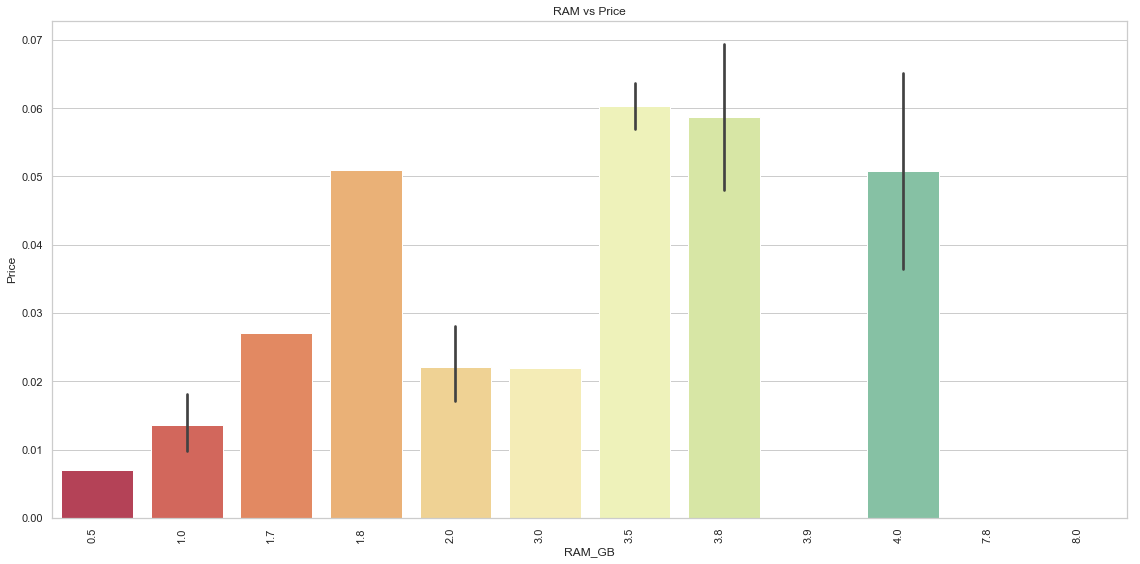

In [527]:
plt.figure(figsize = (16, 8))
# sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="RAM_GB", y="Price", data=data2, palette='Spectral')
ax.set_title("RAM vs Price")
# sns.load_dataset


ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [149]:
# Price vs RAM (GB)edited has a r-squared of .636
results = smf.ols('Price ~ RAM_GB', data2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     96.15
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.12e-13
Time:                        15:51:22   Log-Likelihood:                 166.79
No. Observations:                  57   AIC:                            -329.6
Df Residuals:                      55   BIC:                            -325.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0018      0.004     -0.489      0.627      -0.009       0.006
RAM_GB         0.0149      0.002      9.806      0.000       0.012       0.018
==============================================================================
Omnibus:                        2.585   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.505
Skew:                           0.479   Prob(JB):                        0.286
Kurtosis:                       2.628   Cond. No.                         5.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

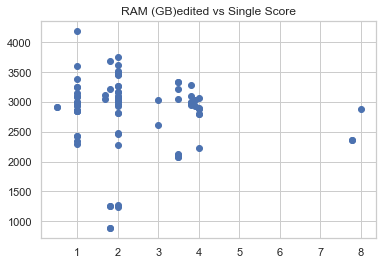

In [148]:
plt.scatter(data2.RAM_GB,data2.Single_Score)
plt.title('RAM (GB)edited vs Single Score')
plt.show()

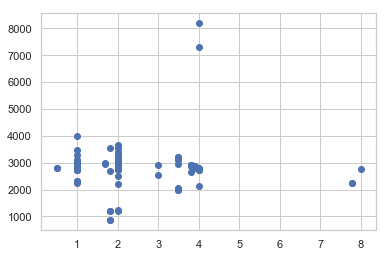

In [129]:
plt.scatter(data2.RAM_GB,data2.Multi_Score)
# plt.xlabel('RAM (GB)')
# plt.ylabel('Price')
# plt.title('RAM (GB) vs Price')
plt.show()

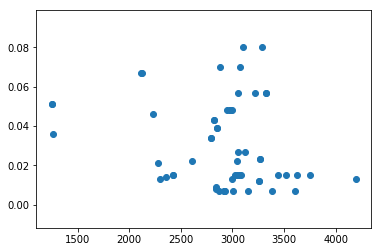

In [13]:
plt.scatter(data2.Single_Score,data2.Price)
# plt.xlabel('RAM (GB)')
# plt.ylabel('Price')
# plt.title('RAM (GB) vs Price')
plt.show()

Text(0.5, 1.0, 'RAM (GB) vs Price')

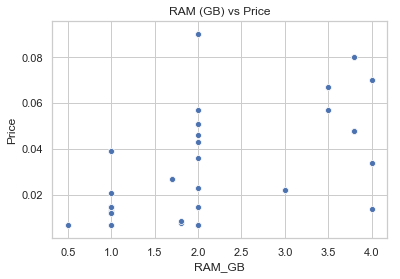

In [142]:
sns.scatterplot(x=data2['RAM_GB'], y=data['Price']).set_title('RAM (GB) vs Price')

In [158]:
#model with ALL variables. r-squared = .769            with unedited RAM.788
f = 'Price~Single_Score+Multi_Score+Price_Score+RAM_GB'
model=smf.ols(formula=f, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     43.28
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           5.95e-16
Time:                        15:56:16   Log-Likelihood:                 179.74
No. Observations:                  57   AIC:                            -349.5
Df Residuals:                      52   BIC:                            -339.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0298      0.008      3.558      0.001       0.013       0.047
Single_Score -5.125e-06   3.36e-06     -1.524      0.134   -1.19e-05    1.62e-06
Multi_Score   3.885e-06   1.67e-06      2.324      0.024     5.3e-07    7.24e-06
Price_Score  -7.632e-06   1.84e-06     -4.155      0.000   -1.13e-05   -3.95e-06
RAM_GB           0.0079      0.002      3.954      0.000       0.004       0.012
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.139
Skew:                           0.465   Prob(JB):                        0.343
Kurtosis:                       3.187   Cond. No.                     2.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
model.params

Intercept       0.029816
Single_Score   -0.000005
Multi_Score     0.000004
Price_Score    -0.000008
RAM_GB          0.007869
dtype: float64

In [160]:
#dropping Price_Score drops r-squared to .692       unedited ram = .491
#DROP CAUSE OF LOW P OR COLINEARITY
f = 'Price~Single_Score+Multi_Score+RAM_GB'
model=smf.ols(formula=f, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     39.76
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.34e-13
Time:                        15:56:35   Log-Likelihood:                 171.57
No. Observations:                  57   AIC:                            -335.1
Df Residuals:                      53   BIC:                            -327.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0235      0.009      2.497      0.016       0.005       0.042
Single_Score -1.085e-05   3.51e-06     -3.095      0.003   -1.79e-05   -3.82e-06
Multi_Score   2.567e-06   1.88e-06      1.368      0.177    -1.2e-06    6.33e-06
RAM_GB           0.0142      0.001      9.582      0.000       0.011       0.017
==============================================================================
Omnibus:                        3.778   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.945
Skew:                           0.538   Prob(JB):                        0.229
Kurtosis:                       3.284   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
#dropped multi_score and price_score r-squared = .681          unedited RAM r-squared:.431
f = 'Price~Single_Score+RAM_GB'
model=smf.ols(formula=f, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     57.77
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.84e-14
Time:                        15:58:46   Log-Likelihood:                 170.58
No. Observations:                  57   AIC:                            -335.2
Df Residuals:                      54   BIC:                            -329.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0226      0.009      2.382      0.021       0.004       0.042
Single_Score -8.311e-06      3e-06     -2.773      0.008   -1.43e-05    -2.3e-06
RAM_GB           0.0147      0.001     10.286      0.000       0.012       0.018
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.117
Skew:                           0.343   Prob(JB):                        0.572
Kurtosis:                       2.969   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
model.params

Intercept       0.022556
Single_Score   -0.000008
RAM_GB          0.014719
dtype: float64

In [164]:
#turn a categorical column into multiple dummy columns
#turning Provider (categorical column) into multiple dummy columns
prov_dummy = pd.get_dummies(data2['Provider'],prefix = 'Provider')
prov_dummy.head()

,Provider_1&1,Provider_Amazon Web Services,Provider_DigitalOcean,Provider_Exoscale,Provider_Google Cloud Platform,Provider_IBM Softlayer,Provider_Joyent,Provider_Linode,Provider_Microsoft Azure,Provider_OVH Group,Provider_T-Systems Open Telekom Cloud,Provider_UpCloud,Provider_Vultr
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


In [165]:
#concating data + prov_dummy into one table named data_dummies
data_dummies = pd.concat([data2, prov_dummy], axis = 1)
data_dummies.columns

Index(['Location', 'Provider', 'Category', 'VM', 'CPU', 'RAM_GB',
       'Single_Score', 'Multi_Score', 'Price', 'Price_Score', 'Provider_1&1',
       'Provider_Amazon Web Services', 'Provider_DigitalOcean',
       'Provider_Exoscale', 'Provider_Google Cloud Platform',
       'Provider_IBM Softlayer', 'Provider_Joyent', 'Provider_Linode',
       'Provider_Microsoft Azure', 'Provider_OVH Group',
       'Provider_T-Systems Open Telekom Cloud', 'Provider_UpCloud',
       'Provider_Vultr'],
      dtype='object')

In [166]:
#renaming column titles to get rid of spaces in names
data_dummies.rename(index=str, columns={'Provider_1&1': 'Provider_1', 'Provider_Amazon Web Services': 'Provider_AWS', 'Provider_Google Cloud Platform': 'Provider_Google',
       'Provider_IBM Softlayer': 'Provider_IBM', 'Provider_Microsoft Azure': 'Provider_Azure', 'Provider_OVH Group': 'Provider_OVH_Group',
       'Provider_T-Systems Open Telekom Cloud': 'Provider_TSystems'}, inplace=True)


In [167]:
data_dummies.columns

Index(['Location', 'Provider', 'Category', 'VM', 'CPU', 'RAM_GB',
       'Single_Score', 'Multi_Score', 'Price', 'Price_Score', 'Provider_1',
       'Provider_AWS', 'Provider_DigitalOcean', 'Provider_Exoscale',
       'Provider_Google', 'Provider_IBM', 'Provider_Joyent', 'Provider_Linode',
       'Provider_Azure', 'Provider_OVH_Group', 'Provider_TSystems',
       'Provider_UpCloud', 'Provider_Vultr'],
      dtype='object')

In [168]:
#adding providers as dummy variables WITH ALL ORIGINAL VARIABLES
f = 'Price~Single_Score+Multi_Score+Price_Score+Provider_1+Provider_AWS+Provider_DigitalOcean+Provider_Exoscale+Provider_Google+Provider_IBM+Provider_Joyent+Provider_Linode+Provider_Azure+Provider_OVH_Group+Provider_TSystems+Provider_UpCloud+Provider_Vultr'
model=smf.ols(formula=f, data=data_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     47.62
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.54e-21
Time:                        15:59:35   Log-Likelihood:                 218.51
No. Observations:                  57   AIC:                            -407.0
Df Residuals:                      42   BIC:                            -376.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0230      0.006      4.001      0.000       0.011       0.035
Single_Score           5.232e-06   2.21e-06      2.363      0.023    7.63e-07     9.7e-06
Multi_Score           -8.885e-07   1.17e-06     -0.757      0.453   -3.26e-06    1.48e-06
Price_Score           -5.421e-06   1.12e-06     -4.837      0.000   -7.68e-06   -3.16e-06
Provider_1               -0.0083      0.003     -2.542      0.015      -0.015      -0.002
Provider_AWS             -0.0091      0.003     -2.952      0.005      -0.015      -0.003
Provider_DigitalOcean    -0.0085      0.002     -3.761      0.001      -0.013      -0.004
Provider_Exoscale        -0.0097      0.006     -1.496      0.142      -0.023       0.003
Provider_Google           0.0090      0.003      3.229      0.002       0.003       0.015
Provider_IBM              0.0072      0.003      2.628      0.012       0.002       0.013
Provider_Joyent           0.0445      0.004     10.487      0.000       0.036       0.053
Provider_Linode          -0.0097      0.003     -3.133      0.003      -0.016      -0.003
Provider_Azure            0.0246      0.003      9.163      0.000       0.019       0.030
Provider_OVH_Group    -5.262e-19      1e-18     -0.526      0.602   -2.54e-18    1.49e-18
Provider_TSystems         0.0004      0.004      0.104      0.918      -0.007       0.008
Provider_UpCloud         -0.0085      0.003     -2.496      0.017      -0.015      -0.002
Provider_Vultr           -0.0089      0.003     -2.561      0.014      -0.016      -0.002
==============================================================================
Omnibus:                        6.728   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.035   Jarque-Bera (JB):               11.450
Skew:                          -0.066   Prob(JB):                      0.00326
Kurtosis:                       5.192   Cond. No.                     1.92e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [204]:
#this model compares Price, Single_Score, RAM_GB and all the providers
#dropped multi_score and price_score 
# r-squared went from .941 to .945
f = 'Price~Single_Score+RAM_GB+Provider_1+Provider_AWS+Provider_DigitalOcean+Provider_Exoscale+Provider_Google+Provider_IBM+Provider_Joyent+Provider_Linode+Provider_Azure+Provider_OVH_Group+Provider_TSystems+Provider_UpCloud+Provider_Vultr'
model=smf.ols(formula=f, data=data_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     56.93
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           9.43e-23
Time:                        16:23:41   Log-Likelihood:                 220.68
No. Observations:                  57   AIC:                            -413.4
Df Residuals:                      43   BIC:                            -384.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0157      0.005      2.938      0.005       0.005       0.026
Single_Score          -4.685e-07   1.98e-06     -0.236      0.815   -4.47e-06    3.53e-06
RAM_GB                    0.0058      0.001      5.604      0.000       0.004       0.008
Provider_1               -0.0087      0.003     -2.893      0.006      -0.015      -0.003
Provider_AWS             -0.0053      0.003     -1.771      0.084      -0.011       0.001
Provider_DigitalOcean    -0.0097      0.002     -4.622      0.000      -0.014      -0.005
Provider_Exoscale        -0.0065      0.006     -1.037      0.305      -0.019       0.006
Provider_Google           0.0088      0.003      3.362      0.002       0.004       0.014
Provider_IBM              0.0108      0.002      4.559      0.000       0.006       0.016
Provider_Joyent           0.0383      0.003     11.132      0.000       0.031       0.045
Provider_Linode          -0.0113      0.003     -3.955      0.000      -0.017      -0.006
Provider_Azure            0.0239      0.003      9.304      0.000       0.019       0.029
Provider_OVH_Group    -5.015e-19   5.33e-19     -0.942      0.352   -1.58e-18    5.73e-19
Provider_TSystems        -0.0011      0.003     -0.316      0.754      -0.008       0.006
Provider_UpCloud         -0.0118      0.003     -3.984      0.000      -0.018      -0.006
Provider_Vultr           -0.0118      0.003     -3.819      0.000      -0.018      -0.006
==============================================================================
Omnibus:                       10.726   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.523
Skew:                          -0.808   Prob(JB):                      0.00315
Kurtosis:                       4.497   Cond. No.                     2.74e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.63e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [205]:
model.params

Intercept                1.569884e-02
Single_Score            -4.685469e-07
RAM_GB                   5.765334e-03
Provider_1              -8.718642e-03
Provider_AWS            -5.318677e-03
Provider_DigitalOcean   -9.658422e-03
Provider_Exoscale       -6.498153e-03
Provider_Google          8.840433e-03
Provider_IBM             1.083715e-02
Provider_Joyent          3.826264e-02
Provider_Linode         -1.126299e-02
Provider_Azure           2.390622e-02
Provider_OVH_Group      -5.015317e-19
Provider_TSystems       -1.080189e-03
Provider_UpCloud        -1.184070e-02
Provider_Vultr          -1.176983e-02
dtype: float64

In [215]:
data_dummies.corr()

,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score,Provider_1,Provider_AWS,Provider_DigitalOcean,Provider_Exoscale,Provider_Google,Provider_IBM,Provider_Joyent,Provider_Linode,Provider_Azure,Provider_OVH_Group,Provider_TSystems,Provider_UpCloud,Provider_Vultr
CPU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAM_GB,NaN,1.000000,-0.095935,0.059962,0.797580,-0.700196,-0.244901,-0.132610,0.141355,-0.101843,0.132647,-0.009727,0.111722,-0.132610,0.012950,0.084485,0.152855,-0.132610,-0.132610
Single_Score,NaN,-0.095935,1.000000,0.621210,-0.239531,0.407661,-0.018989,0.154376,-0.004208,0.242155,0.079764,-0.006684,0.098285,0.042668,-0.381508,0.056178,-0.090055,0.137329,0.192186
Multi_Score,NaN,0.059962,0.621210,1.000000,0.153002,0.137785,0.002230,0.061963,-0.051068,0.131395,0.023011,-0.027435,0.410174,-0.003790,-0.311980,0.000725,-0.094597,0.059879,0.096576
Price,NaN,0.797580,-0.239531,0.153002,1.000000,-0.792001,-0.261072,-0.165255,-0.294731,-0.108348,0.168519,0.131300,0.569348,-0.239354,0.505849,NaN,-0.037653,-0.248297,-0.248297
Price_Score,NaN,-0.700196,0.407661,0.137785,-0.792001,1.000000,0.284348,0.051732,0.186703,0.175035,-0.247434,-0.261239,-0.206984,0.198975,-0.433128,NaN,-0.097262,0.316999,0.325526
Provider_1,NaN,-0.244901,-0.018989,0.002230,-0.261072,0.284348,1.000000,-0.050000,-0.082199,-0.024544,-0.062017,-0.062017,-0.072548,-0.050000,-0.133199,-0.050000,-0.067420,-0.050000,-0.050000
Provider_AWS,NaN,-0.132610,0.154376,0.061963,-0.165255,0.051732,-0.050000,1.000000,-0.082199,-0.024544,-0.062017,-0.062017,-0.072548,-0.050000,-0.133199,-0.050000,-0.067420,-0.050000,-0.050000
Provider_DigitalOcean,NaN,0.141355,-0.004208,-0.051068,-0.294731,0.186703,-0.082199,-0.082199,1.000000,-0.040350,-0.101956,-0.101956,-0.119268,-0.082199,-0.218978,-0.082199,-0.110838,-0.082199,-0.082199
Provider_Exoscale,NaN,-0.101843,0.242155,0.131395,-0.108348,0.175035,-0.024544,-0.024544,-0.040350,1.000000,-0.030443,-0.030443,-0.035612,-0.024544,-0.065385,-0.024544,-0.033095,-0.024544,-0.024544


In [223]:
#dropping exoscale and ovh and tsystems for having very large p-values
f = 'Price~Single_Score+RAM_GB+Provider_1+Provider_AWS+Provider_DigitalOcean+Provider_Google+Provider_IBM+Provider_Joyent+Provider_Linode+Provider_Azure+Provider_UpCloud+Provider_Vultr'
model=smf.ols(formula=f, data=data_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     62.41
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.45e-23
Time:                        17:13:43   Log-Likelihood:                 220.38
No. Observations:                  57   AIC:                            -414.8
Df Residuals:                      44   BIC:                            -388.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0148      0.006      2.674      0.010       0.004       0.026
Single_Score          -1.172e-06   1.68e-06     -0.698      0.489   -4.56e-06    2.21e-06
RAM_GB                    0.0060      0.001      6.166      0.000       0.004       0.008
Provider_1               -0.0060      0.004     -1.409      0.166      -0.015       0.003
Provider_AWS             -0.0024      0.004     -0.576      0.567      -0.011       0.006
Provider_DigitalOcean    -0.0070      0.004     -1.980      0.054      -0.014       0.000
Provider_Google           0.0112      0.004      2.893      0.006       0.003       0.019
Provider_IBM              0.0132      0.004      3.544      0.001       0.006       0.021
Provider_Joyent           0.0405      0.004      9.065      0.000       0.032       0.050
Provider_Linode          -0.0086      0.004     -2.082      0.043      -0.017      -0.000
Provider_Azure            0.0258      0.004      6.992      0.000       0.018       0.033
Provider_UpCloud         -0.0090      0.004     -2.143      0.038      -0.017      -0.001
Provider_Vultr           -0.0088      0.004     -2.072      0.044      -0.017      -0.000
==============================================================================
Omnibus:                       12.645   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.351
Skew:                          -0.862   Prob(JB):                     0.000464
Kurtosis:                       4.869   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [502]:
#dropping aws
f = 'Price~Single_Score+RAM_GB+Provider_DigitalOcean+Provider_Google+Provider_IBM+Provider_Joyent+Provider_Linode+Provider_Azure+Provider_UpCloud+Provider_Vultr'
model=smf.ols(formula=f, data=data_dummies).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           5.12e-25
Time:                        17:49:22   Log-Likelihood:                 219.11
No. Observations:                  57   AIC:                            -416.2
Df Residuals:                      46   BIC:                            -393.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0116      0.005      2.304      0.026       0.001       0.022
Single_Score          -1.246e-06   1.64e-06     -0.762      0.450   -4.54e-06    2.05e-06
RAM_GB                    0.0064      0.001      6.856      0.000       0.005       0.008
Provider_DigitalOcean    -0.0044      0.003     -1.647      0.106      -0.010       0.001
Provider_Google           0.0134      0.003      4.083      0.000       0.007       0.020
Provider_IBM              0.0157      0.003      5.190      0.000       0.010       0.022
Provider_Joyent           0.0424      0.004     10.495      0.000       0.034       0.050
Provider_Linode          -0.0058      0.003     -1.745      0.088      -0.013       0.001
Provider_Azure            0.0280      0.003      8.855      0.000       0.022       0.034
Provider_UpCloud         -0.0062      0.003     -1.841      0.072      -0.013       0.001
Provider_Vultr           -0.0060      0.003     -1.763      0.085      -0.013       0.001
==============================================================================
Omnibus:                       12.135   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.722
Skew:                          -0.781   Prob(JB):                     0.000385
Kurtosis:                       5.044   Cond. No.                     2.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

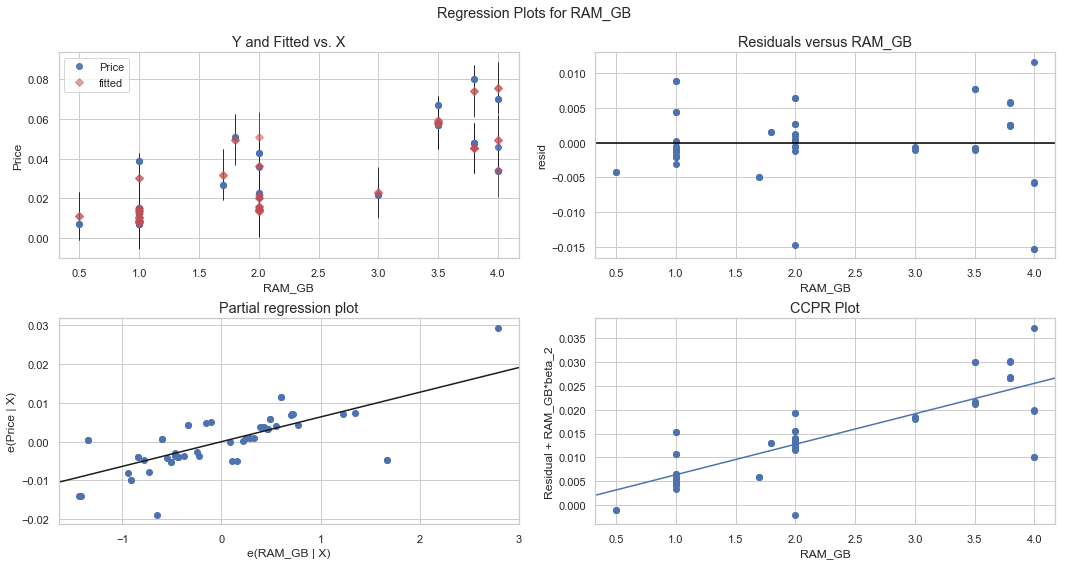

In [504]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RAM_GB", fig=fig)
plt.show()

/Users/fhel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


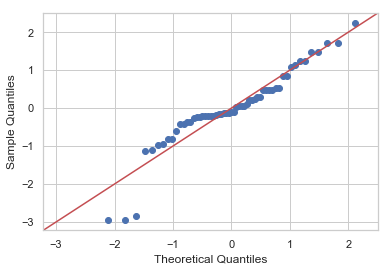

In [521]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [505]:
model.params

Intercept                0.011628
Single_Score            -0.000001
RAM_GB                   0.006375
Provider_DigitalOcean   -0.004364
Provider_Google          0.013365
Provider_IBM             0.015679
Provider_Joyent          0.042356
Provider_Linode         -0.005810
Provider_Azure           0.027983
Provider_UpCloud        -0.006184
Provider_Vultr          -0.005996
dtype: float64

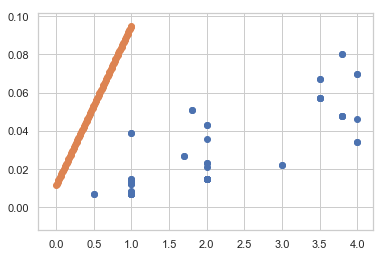

In [519]:
#create scatterplot of data
plt.scatter(data2.RAM_GB,data2.Price)

#use model to create a the line of best fit
X_plot = np.linspace(0,1,100)
Y_plot = X_plot*model.params[1] + X_plot*model.params[2] + X_plot*model.params[3] + X_plot*model.params[4] + X_plot*model.params[5] + X_plot*model.params[6] + X_plot*model.params[7] + X_plot*model.params[8] + X_plot*model.params[9] + X_plot*model.params[10] + model.params[0]
plt.scatter(X_plot, Y_plot)

plt.show()

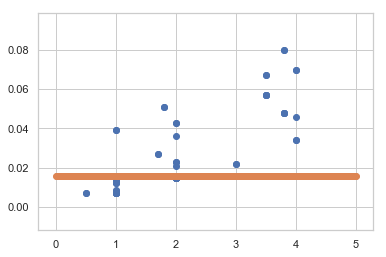

In [188]:
#create scatterplot of data
plt.scatter(data2.RAM_GB,data2.Price)

#use model to create a the line of best fit
X_plot = np.linspace(0,5,250)
Y_plot = X_plot*model.params[1] + model.params[0]
plt.scatter(X_plot, Y_plot)

plt.show()

In [ ]:
#too many parameters?  trying again before the dummy variables

In [237]:
#dropped multi_score and price_score r-squared = .681          unedited RAM r-squared:.431
f = 'Price~Single_Score+RAM_GB'
model=smf.ols(formula=f, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     57.77
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.84e-14
Time:                        17:45:33   Log-Likelihood:                 170.58
No. Observations:                  57   AIC:                            -335.2
Df Residuals:                      54   BIC:                            -329.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0226      0.009      2.382      0.021       0.004       0.042
Single_Score -8.311e-06      3e-06     -2.773      0.008   -1.43e-05    -2.3e-06
RAM_GB           0.0147      0.001     10.286      0.000       0.012       0.018
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.117
Skew:                           0.343   Prob(JB):                        0.572
Kurtosis:                       2.969   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
model.params

Intercept       0.022556
Single_Score   -0.000008
RAM_GB          0.014719
dtype: float64

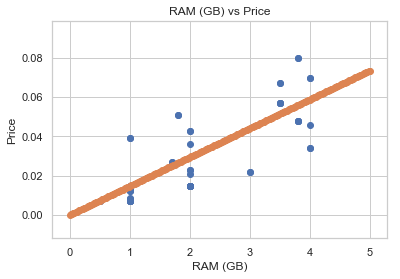

In [493]:
#create scatterplot of data
plt.scatter(data2.RAM_GB,data2.Price)
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('RAM (GB) vs Price')

#use model to create a the line of best fit
X_plot = np.linspace(0,5,250)
Y_plot = X_plot*model.params[1] + X_plot*model.params[2] + model.params[0]
plt.scatter(X_plot, Y_plot)

plt.show()

In [523]:
Y_predicted = Y_plot = X_plot*model.params[1] + X_plot*model.params[2] + X_plot*model.params[3] + X_plot*model.params[4] + X_plot*model.params[5] + X_plot*model.params[6] + X_plot*model.params[7] + X_plot*model.params[8] + X_plot*model.params[9] + X_plot*model.params[10] + model.params[0]

sns.residplot(Y_predicted,data2.RAM_GB)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [501]:
Y_predicted

array([0.        , 0.00029539, 0.00059077, 0.00088616, 0.00118155,
       0.00147694, 0.00177232, 0.00206771, 0.0023631 , 0.00265848,
       0.00295387, 0.00324926, 0.00354465, 0.00384003, 0.00413542,
       0.00443081, 0.00472619, 0.00502158, 0.00531697, 0.00561236,
       0.00590774, 0.00620313, 0.00649852, 0.0067939 , 0.00708929,
       0.00738468, 0.00768007, 0.00797545, 0.00827084, 0.00856623,
       0.00886161, 0.009157  , 0.00945239, 0.00974778, 0.01004316,
       0.01033855, 0.01063394, 0.01092932, 0.01122471, 0.0115201 ,
       0.01181549, 0.01211087, 0.01240626, 0.01270165, 0.01299703,
       0.01329242, 0.01358781, 0.0138832 , 0.01417858, 0.01447397,
       0.01476936, 0.01506474, 0.01536013, 0.01565552, 0.01595091,
       0.01624629, 0.01654168, 0.01683707, 0.01713246, 0.01742784,
       0.01772323, 0.01801862, 0.018314  , 0.01860939, 0.01890478,
       0.01920017, 0.01949555, 0.01979094, 0.02008633, 0.02038171,
       0.0206771 , 0.02097249, 0.02126788, 0.02156326, 0.02185

In [349]:
X = data2[['Single_Score', 'Multi_Score', 'RAM_GB']]
y = data2['Price']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()


/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Apr 2019   Prob (F-statistic):                nan
Time:                        00:35:47   Log-Likelihood:                    nan
No. Observations:                  84   AIC:                               nan
Df Residuals:                      80   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const               nan        nan        nan        nan         nan         nan
Single_Score        nan        nan        nan        nan         nan         nan
Multi_Score         nan        nan        nan        nan         nan         nan
RAM_GB              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [426]:
data2.corr

<bound method DataFrame.corr of          Location                      Provider               Category  \
0       Worldwide                           1&1        General Purpose   
1   North America                           1&1        General Purpose   
2       Worldwide                           1&1        General Purpose   
3   North America                           1&1        General Purpose   
4       Worldwide           Amazon Web Services  Burstable Performance   
5   North America           Amazon Web Services  Burstable Performance   
6       Worldwide           Amazon Web Services  Burstable Performance   
7   North America           Amazon Web Services  Burstable Performance   
8       Worldwide                  DigitalOcean        General Purpose   
9   North America                  DigitalOcean        General Purpose   
10      Worldwide                  DigitalOcean                    NaN   
11  North America                  DigitalOcean                    NaN   
12  No

<h3> INTERACTIONS? </h3>

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

In [343]:
data2.shape

(84, 10)

In [400]:
#dropped rows with null values
data3 = data2.dropna()
print(data3.shape)
data3.head()

(57, 10)


,Location,Provider,Category,VM,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score
0,Worldwide,1&1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0
1,North America,1&1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0
2,Worldwide,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
3,North America,1&1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0
4,Worldwide,Amazon Web Services,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0


In [408]:
data3['Provider'].value_counts()

Microsoft Azure                 9
DigitalOcean                    8
Google Cloud Platform           6
IBM Softlayer                   6
Vultr                           4
Linode                          4
Amazon Web Services             4
Joyent                          4
UpCloud                         4
1&1                             4
T-Systems Open Telekom Cloud    3
Exoscale                        1
Name: Provider, dtype: int64

In [409]:
data3.replace({'1&1': 1, 
                'Amazon Web Services': 2, 
                'Google Cloud Platform': 3,
                'Microsoft Azure': 4, 
                'IBM Softlayer': 5, 
                "Exoscale": 6,
                'T-Systems Open Telekom Cloud': 7, 
                "DigitalOcean": 8, 
                "Vultr": 9, 
                "Linode":10, 
                "Joyent":11, 
                "UpCloud": 12, }, inplace=True)


/Users/fhel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [411]:
data3.head()

,Location,Provider,Category,VM,CPU,RAM_GB,Single_Score,Multi_Score,Price,Price_Score,Provider_no
0,Worldwide,1,General Purpose,M,1,1.0,2298,2963,0.013,2202.0,1
1,North America,1,General Purpose,M,1,1.0,2998,2863,0.013,2202.0,1
2,Worldwide,1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0,1
3,North America,1,General Purpose,S,1,0.5,2919,2794,0.007,3978.0,1
4,Worldwide,2,Burstable Performance,t2.micro,1,1.0,3259,3106,0.012,2588.0,2


In [410]:
# #renaming Providers to get rid of spaces in names
# data3.replace({'1&1': '1_and_1', 'Amazon Web Services': 'AWS', 'Google Cloud Platform': 'Google_Cloud',
#        'IBM Softlayer': 'IBM', 'Microsoft Azure': 'Microsoft_Azure', 'OVH Group': 'OVH_Group',
#        'T-Systems Open Telekom Cloud': 'TSystems'}, inplace=True)

# data3['Provider'].head()

In [432]:
ram = data3["RAM_GB"]
logsingle = np.log(data3["Single_Score"])
logmulti = np.log(data3["Multi_Score"])


scaled_ram = (ram-min(ram))/(max(ram)-min(ram))	
scaled_single = (logsingle-np.mean(logsingle))/np.sqrt(np.var(logsingle))
scaled_multi = (logmulti-np.mean(logmulti))/(max(logmulti)-min(logmulti))


data_fin = pd.DataFrame([])
data_fin["RAM"]= scaled_ram
data_fin["Single_Score"]= scaled_single
data_fin["Multi_Score"] = scaled_multi
price = data3["Price"]
data_fin = pd.concat([price, data_fin, data3['Provider'], data3['RAM_GB']], axis=1)
y = data_fin[["Price"]]
X = data_fin.drop(["Price"], axis=1)

In [433]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))
baseline


0.5250802513147969

In [434]:
data_fin.head()

,Price,RAM,Single_Score,Multi_Score,Provider,RAM_GB
0,0.013,0.142857,-0.888727,0.024087,1,1.0
1,0.013,0.142857,0.244739,0.006173,1,1.0
2,0.007,0.000000,0.130908,-0.006556,1,0.5
3,0.007,0.000000,0.130908,-0.006556,1,0.5
4,0.012,0.142857,0.600564,0.048681,2,1.0


In [416]:
prov_2 = data_fin[data_fin["Provider"]==2]
prov_3 = data_fin[data_fin["Provider"]==3]
prov_4 = data_fin[data_fin["Provider"]==4]
prov_2.head()

,Price,RAM,Single_Score,Multi_Score,Provider
4,0.012,0.142857,0.600564,0.048681,2
5,0.012,0.142857,0.600564,0.048681,2
6,0.023,0.428571,0.607099,0.050525,2
7,0.023,0.428571,0.607099,0.050525,2


In [450]:
print(prov_2['Price'].shape)
price

(4,)

In [448]:


regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

price_2 = prov_2["Price"].values.reshape(-1, 1)
price_3 = prov_3["Price"].values.reshape(-1, 1)
price_4 = prov_4["Price"].values.reshape(-1, 1)

regression_1.fit(price_2, prov_2["RAM"])
regression_2.fit(price_3, prov_3["RAM"])
regression_3.fit(price_4, prov_4["RAM"])

# Make predictions using the testing set
pred_2 = regression_1.predict(price_2)
pred_3 = regression_2.predict(price_3)
pred_4 = regression_3.predict(price_4)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[25.97402597]
[28.57142857]
[18.44704591]


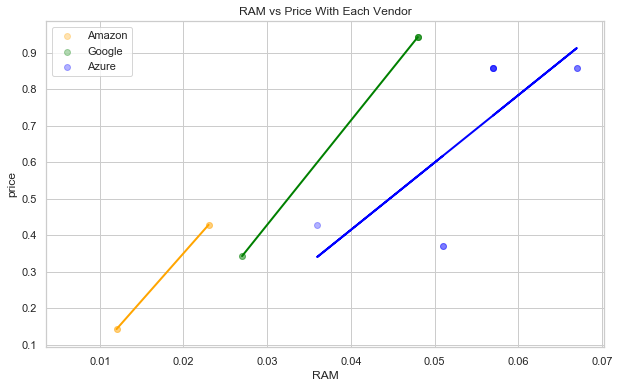

In [457]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(price_2, prov_2["RAM"],  color='orange', alpha = 0.3, label = "Amazon")
plt.scatter(price_3, prov_3["RAM"],  color='green', alpha = 0.3, label = "Google")
plt.scatter(price_4, prov_4["RAM"],  color='blue', alpha = 0.3, label = "Azure")

plt.plot(price_2, pred_2,  color='orange', linewidth=2)
plt.plot(price_3, pred_3,  color='green', linewidth=2)
plt.plot(price_4, pred_4,  color='blue', linewidth=2)
plt.ylabel("price")
plt.xlabel("RAM")
plt.title("RAM vs Price With Each Vendor")
plt.legend();

Interaction #2

In [458]:
ram = data3["RAM_GB"]
logsingle = np.log(data3["Single_Score"])
logmulti = np.log(data3["Multi_Score"])


scaled_ram = (ram-min(ram))/(max(ram)-min(ram))	
scaled_single = (logsingle-np.mean(logsingle))/np.sqrt(np.var(logsingle))
scaled_multi = (logmulti-np.mean(logmulti))/(max(logmulti)-min(logmulti))


data_fin = pd.DataFrame([])
data_fin["RAM"]= scaled_ram
data_fin["Single_Score"]= scaled_single
data_fin["Multi_Score"] = scaled_multi
price = data3["Price"]
data_fin = pd.concat([price, data_fin, data3['Provider'], data3['RAM_GB']], axis=1)
y = data_fin[["Single_Score"]]
X = data_fin.drop(["Single_Score"], axis=1)

In [459]:
prov_2 = data_fin[data_fin["Provider"]==2]
prov_3 = data_fin[data_fin["Provider"]==3]
prov_4 = data_fin[data_fin["Provider"]==4]
prov_2.head()

,Price,RAM,Single_Score,Multi_Score,Provider,RAM_GB
4,0.012,0.142857,0.600564,0.048681,2,1.0
5,0.012,0.142857,0.600564,0.048681,2,1.0
6,0.023,0.428571,0.607099,0.050525,2,2.0
7,0.023,0.428571,0.607099,0.050525,2,2.0


In [460]:


regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

price_2 = prov_2["Price"].values.reshape(-1, 1)
price_3 = prov_3["Price"].values.reshape(-1, 1)
price_4 = prov_4["Price"].values.reshape(-1, 1)

regression_1.fit(price_2, prov_2["Single_Score"])
regression_2.fit(price_3, prov_3["Single_Score"])
regression_3.fit(price_4, prov_4["Single_Score"])

# Make predictions using the testing set
pred_2 = regression_1.predict(price_2)
pred_3 = regression_2.predict(price_3)
pred_4 = regression_3.predict(price_4)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[0.59407337]
[-7.75671174]
[106.50953925]


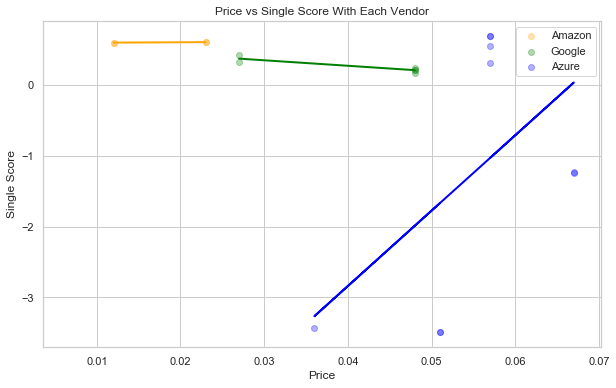

In [471]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(price_2, prov_2["Single_Score"],  color='orange', alpha = 0.3, label = "Amazon")
plt.scatter(price_3, prov_3["Single_Score"],  color='green', alpha = 0.3, label = "Google")
plt.scatter(price_4, prov_4["Single_Score"],  color='blue', alpha = 0.3, label = "Azure")

plt.plot(price_2, pred_2,  color='orange', linewidth=2)
plt.plot(price_3, pred_3,  color='green', linewidth=2)
plt.plot(price_4, pred_4,  color='blue', linewidth=2)
plt.ylabel("Single Score")
plt.xlabel("Price")
plt.title("Price vs Single Score With Each Vendor")
plt.legend();